In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from plot_util import get_colormap

%matplotlib inline

In [2]:
wine = pd.read_csv('data/wine.data')

In [3]:
wine[:5]

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavnoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
y = wine['Class label']

In [5]:
y.value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [6]:
X = wine.iloc[:, 1:]

In [7]:
X[:5]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavnoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_std = scaler.fit_transform(X)

In [11]:
DataFrame(X_std, columns=X.columns)[:5]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavnoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [12]:
X_train, X_test, X_std_train, X_std_test, y_train, y_test = train_test_split(
    X, X_std, y, test_size=0.3
)

In [13]:
model = LogisticRegression()

In [14]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
test_score1 = model.score(X_test, y_test)
train_score1 = model.score(X_train, y_train)

In [16]:
test_score1, train_score1

(0.96296296296296291, 0.967741935483871)

In [17]:
model.fit(X_std_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
test_score2 = model.score(X_std_test, y_test)
train_score2 = model.score(X_std_train, y_train)

In [19]:
test_score2, train_score2

(1.0, 1.0)

# 차원축소

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)

In [22]:
X_pca = pca.fit_transform(X_std)

In [23]:
X.shape

(178, 13)

In [24]:
X_pca.shape

(178, 2)

In [25]:
DataFrame(X_pca)[:5]

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [26]:
X_train, X_test, X_pca_tr, X_pca_te, y_train, y_test = train_test_split(
    X, X_pca, y, test_size=0.3)

In [27]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
model.score(X_test, y_test)

0.94444444444444442

In [29]:
model.fit(X_pca_tr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
model.score(X_pca_te, y_test)

0.94444444444444442

PCA 왜 잘 되었을까?

In [31]:
colormap = get_colormap(y)

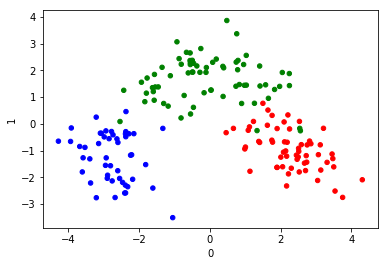

In [32]:
DataFrame(X_pca).plot(kind='scatter', x=0, y=1, c=colormap)

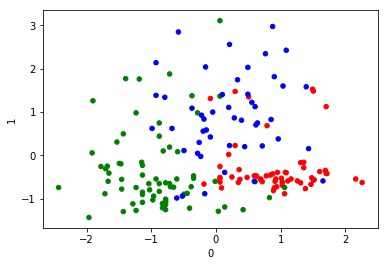

In [33]:
DataFrame(X_std).plot(kind='scatter', x=0, y=1, c=colormap)

다중 분류

In [34]:
model.coef_

array([[ 1.53524201, -1.29287666],
       [ 0.12821913,  2.9204958 ],
       [-1.54644963, -1.51369667]])

각 특징의 기여도

In [35]:
pca = PCA(n_components=None)

In [36]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
기여도 = pca.explained_variance_ratio_

In [38]:
기여도 = Series(기여도, index=X.columns)

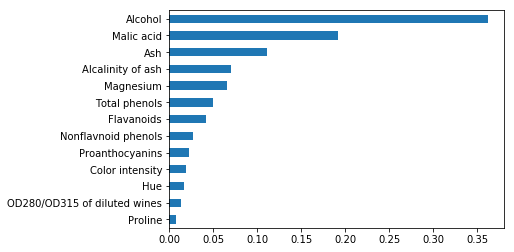

In [39]:
기여도.sort_values().plot(kind='barh')

In [40]:
round(기여도.sum())

1

PCA가 늘 성공하지는 않습니다.

In [41]:
from sklearn.datasets import make_moons

In [42]:
X, y = make_moons(n_samples=100)

In [43]:
colormap = get_colormap(Series(y))

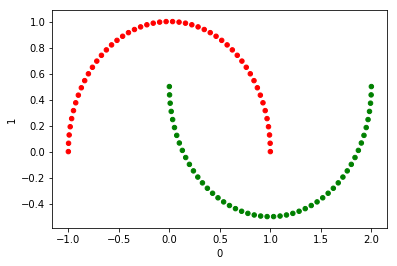

In [44]:
DataFrame(X).plot(kind='scatter', x=0, y=1, c=colormap)

In [45]:
pca = PCA(n_components=2)

In [46]:
X_pca = pca.fit_transform(X)

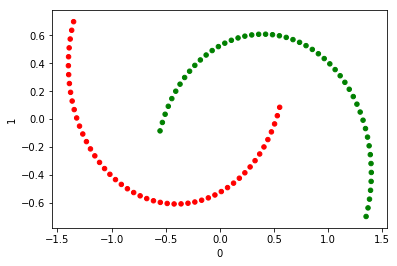

In [47]:
DataFrame(X_pca).plot(kind='scatter', x=0, y=1, c=colormap)

In [48]:
from sklearn.decomposition import KernelPCA

In [49]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)

In [50]:
X_kpca = kpca.fit_transform(X)

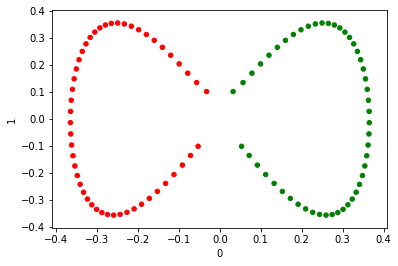

In [51]:
DataFrame(X_kpca).plot(kind='scatter', x=0, y=1, c=colormap)

In [52]:
from sklearn.datasets import make_circles

In [53]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2)

In [54]:
colormap = get_colormap(Series(y))

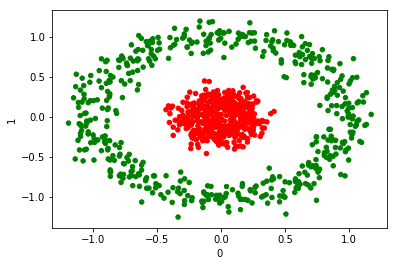

In [55]:
DataFrame(X).plot(kind='scatter', x=0, y=1, c=colormap)

In [56]:
X_kpca = kpca.fit_transform(X)

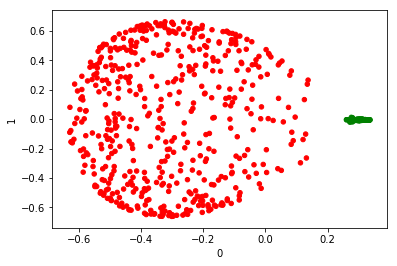

In [57]:
DataFrame(X_kpca).plot(kind='scatter', x=0, y=1, c=colormap)

In [58]:
종양 = pd.read_csv('data/wdbc.data', header=None)

In [59]:
y = 종양[1]

In [60]:
y.value_counts()

B    357
M    212
Name: 1, dtype: int64

In [61]:
X = 종양.iloc[:, 2:]

In [62]:
X.shape

(569, 30)

In [63]:
scaler = StandardScaler()

In [64]:
X_std = scaler.fit_transform(X)

In [65]:
pca2 = PCA(n_components=2)

In [66]:
X_pca2 = pca2.fit_transform(X_std)

In [67]:
pca3 = PCA(n_components=3)

In [68]:
X_pca3 = pca3.fit_transform(X_std)

In [69]:
X_tr, X_te, X_std_tr, X_std_te, \
X_pca2_tr, X_pca2_te, X_pca3_tr, X_pca3_te,\
y_train, y_test = train_test_split(
    X, X_std, X_pca2, X_pca3, y, test_size=0.3)

In [70]:
model = LogisticRegression(C=1.0)

In [71]:
X_sets = [
    ('raw', X_tr, X_te), 
    ('scaled', X_std_tr, X_std_te), 
    ('pca2', X_pca2_tr, X_pca2_te),
    ('pca3', X_pca3_tr, X_pca3_te)
]

results = []
for setname, X_train, X_test in X_sets:
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_score = model.score(X_train, y_train)
    results.append((test_score, train_score))

In [72]:
report = DataFrame(
    results, index=[entry[0] for entry in X_sets])
report.columns = ['test', 'train']

In [73]:
report

,test,train
raw,0.947368,0.954774
scaled,0.976608,0.984925
pca2,0.964912,0.952261
pca3,0.953216,0.949749


# 파이프라인

In [74]:
from sklearn.pipeline import Pipeline

In [75]:
pipe = Pipeline([
    ('scaler', StandardScaler()),    
    ('model', LogisticRegression(C=1.))
])

In [76]:
pipe_pca2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('model', LogisticRegression(C=1.))
])

In [77]:
pipe_pca3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('model', LogisticRegression(C=1.))
])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [79]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [80]:
pipe.score(X_test, y_test)

0.99415204678362568

In [81]:
pipe_pca2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [82]:
pipe_pca2.score(X_test, y_test)

0.98245614035087714

In [83]:
pipe_pca3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [84]:
pipe_pca3.score(X_test, y_test)

0.95906432748538006

# 모델 평가

In [85]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=1.0))
])

샘플 수에 따른 성능 평가

In [86]:
from sklearn.model_selection import learning_curve

샘플 개수를 10, 20, ... 100%로 변경하면서 모델 평가

In [87]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipe,
    X=X_train, y=y_train,
    train_sizes=np.linspace(0.1, 1., 10),
    cv=3
)

In [88]:
np.linspace(0.1, 1., 10)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [89]:
train_results = DataFrame(train_scores, index=train_sizes)

In [90]:
val_results = DataFrame(val_scores, index=train_sizes)

In [91]:
train_mean = train_results.mean(1)

In [92]:
val_mean = val_results.mean(1)

In [93]:
learning_results = pd.concat([train_mean, val_mean], axis=1)
learning_results.columns = ['train', 'val']

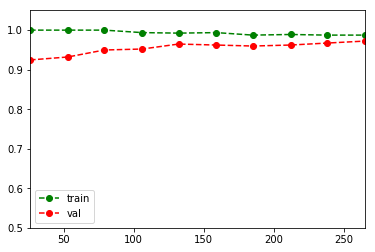

In [94]:
learning_results.plot(style=['go--', 'ro--'], ylim=(0.5, 1.05))

하이퍼 파라메터에 따른 성능 평가

In [95]:
from sklearn.model_selection import validation_curve

In [96]:
params = [0.001, 0.01, 0.1, 1., 10., 100., 1000.]

In [97]:
train_scores, val_scores = validation_curve(
    estimator=pipe,
    X=X_train, y=y_train,
    param_name='model__C',
    param_range=params, 
    cv=10
)

In [98]:
train_results = DataFrame(train_scores, index=params)

In [99]:
val_results = DataFrame(val_scores, index=params)

In [100]:
train_mean = train_results.mean(1)
val_mean = val_results.mean(1)

In [101]:
param_results = pd.concat([train_mean, val_mean], axis=1)

In [102]:
param_results.columns = ['train', 'val']

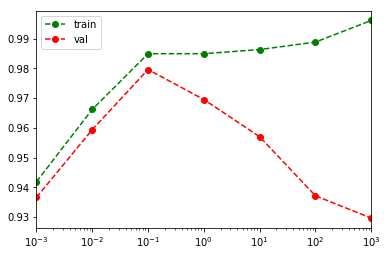

In [103]:
param_results.plot(style=['go--', 'ro--'], logx=True)

#### 연습

현재 구성된 데이터에 대해, 

1. 다음의 모델의 C값의 최적값은 얼마인지 살펴봅니다.
1. 몇 개 이상의 샘플에서 결과가 안정되는지 살펴봅니다.

In [104]:
from sklearn.svm import SVC

In [105]:
SVC(kernel='linear')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear'))
])

In [107]:
params

[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [108]:
train_scores, val_scores = validation_curve(
    estimator=pipe_svc,
    X=X_train, y=y_train,
    param_name='model__C',
    param_range=params,
    cv=10
)

In [109]:
train_results = DataFrame(train_scores, index=params)
train_mean = train_results.mean(1)

In [110]:
val_reusults = DataFrame(val_scores, index=params)
val_mean = val_results.mean(1)

In [111]:
param_results = pd.concat([train_mean, val_mean], axis=1)
param_results.columns = ['train', 'val']
param_results

,train,val
0.001,0.942488,0.936660
0.010,0.969846,0.959420
0.100,0.982686,0.979615
1.000,0.984361,0.969545
10.000,0.989390,0.957039
100.000,0.996649,0.937215
1000.000,0.998604,0.929715


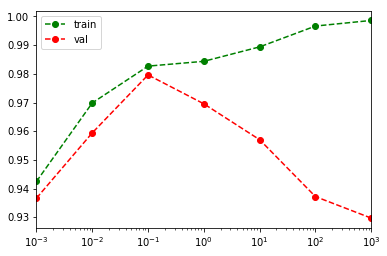

In [112]:
param_results.plot(style=['go--', 'ro--'], logx=True)

# 그리드 탐색

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('model', LogisticRegression())
])

In [115]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
param_grid = [
    {'model__C': params},
    {
        'pca__n_components': [2,3,4], 
        'model__C': params,
        'model__penalty': ['l1', 'l2']
    }
]

In [117]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10
)

In [118]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', LogisticRegression(C=1.0, class_weight=None, dual...y='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'model__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}, {'pca__n_components': [2, 3, 4], 'model__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'model__penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [119]:
gs.best_score_

0.957286432160804

In [120]:
gs.best_params_

{'model__C': 1.0, 'model__penalty': 'l1', 'pca__n_components': 4}

In [121]:
best_model = gs.best_estimator_

In [122]:
best_model.score(X_test, y_test)

0.98830409356725146

# 평가 지표

In [123]:
y_pred = best_model.predict(X_test)

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [126]:
confmat = DataFrame(confmat, index=['P', 'N'], columns=['P', 'N'])
confmat.index.name = '실제'
confmat.columns.name = '예측'
confmat

예측,P,N
실제,,
P,110,1
N,1,59


### F1 score

In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [128]:
precision_score(y_test, y_pred, pos_label='M')

0.98333333333333328

In [129]:
recall_score(y_test, y_pred, pos_label='M')

0.98333333333333328

In [130]:
f1_score(y_test, y_pred, pos_label='M')

0.98333333333333328

ROC 

In [131]:
예측확률 = best_model.predict_proba(X_test)

In [132]:
probas = DataFrame(예측확률, columns=['B', 'M'])

In [133]:
probas.index = y_test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd633e4c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbd633f2470>]], dtype=object)

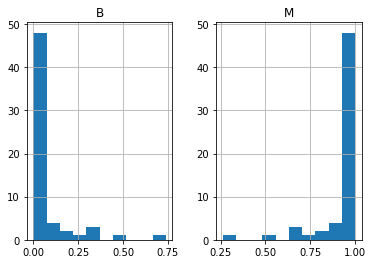

In [134]:
probas.loc['M'].hist()

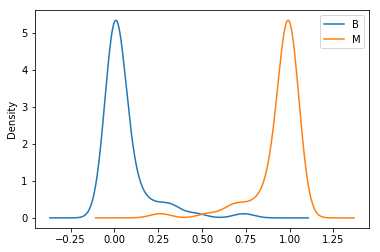

In [135]:
probas.loc['M'].plot(kind='kde')

좋지 않은 경우는 다음과 같은 분포를 보입니다.

In [136]:
random_guess = np.random.normal(loc=0.5, scale=0.1, size=(10, 2))

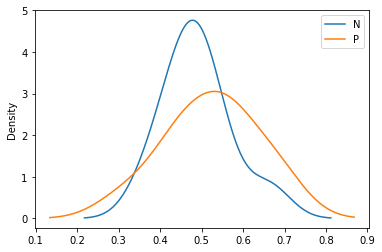

In [137]:
DataFrame(random_guess, columns=['N', 'P']).plot(kind='kde')

In [138]:
from sklearn.metrics import roc_curve, auc

In [139]:
fpr, tpr, thresholds = roc_curve(
    y_true=y_test, y_score=probas['M'], pos_label='M'
)

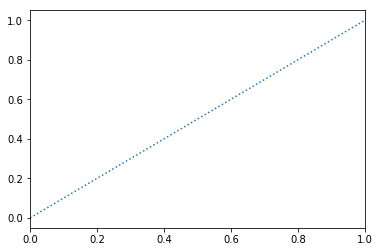

In [140]:
그래프 = Series([0, 1]).plot(style=':')

In [141]:
Series([0, 0, 1], index=[0, 0, 1]).plot(ax=그래프, style='--')

In [142]:
Series(tpr, index=fpr).plot(ax=그래프)

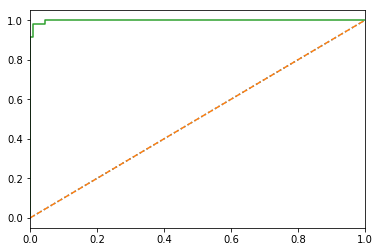

In [143]:
그래프.figure